In [18]:
import matplotlib.pylab as plt
import numpy as np
from copy import deepcopy

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Test the Motif Plotting

The code is mostly taken and from this <a href="https://github.com/saketkc/motif-logos-matplotlib/blob/master/Motif%20Logos%20using%20matplotlib.ipynb">notebook</a>

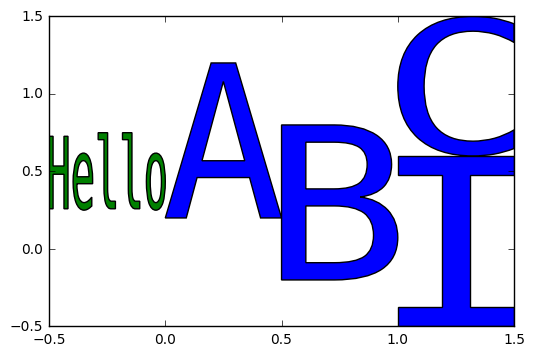

In [30]:
from motif_plotter import *

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_ylim(-0.5,1.5)
ax1.set_xlim(-0.5,1.5)

word_shape = make_text_elements('Hello', x=-0.5,y=0.25,width=0.5,height=0.5, color="green")
a_shape = make_text_elements('A', x=0,   y=0.2,  width=0.5)
b_shape = make_text_elements('B', x=0.5, y=-0.2, width=0.5)
c_shape = make_text_elements('C', x=1,   y=0.6,  width=0.5, height=0.9)
i_shape = make_text_elements('I', x=1, y=-0.5, width=0.5, height=1.1)
ax1.add_patch(word_shape)
ax1.add_patch(a_shape)
ax1.add_patch(b_shape)
ax1.add_patch(c_shape)
ax1.add_patch(i_shape)
plt.show()

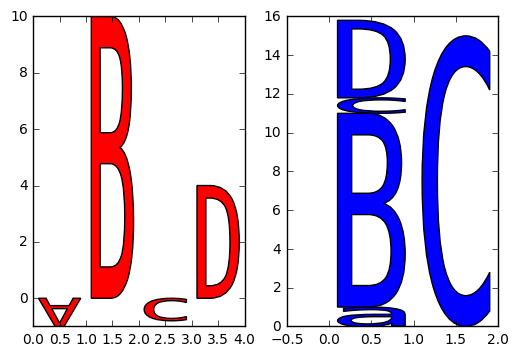

In [3]:
from motif_plotter import *

fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
make_bar_plot(ax1, list("ABCD"), [-1, 10, -0.8, 4], colors=['red'])

ax2=fig.add_subplot(1,2,2)
make_stacked_bar_plot(ax2, [list("aBcD"), list("C")], [[1, 10, 0.8, 4], [15]])

plt.show()

/home/constantin/prog/embl/motif_plotter/motif_plotter/information_helper.py:70: RuntimeWarning: divide by zero encountered in log2
  info_matrix = [2-error+sum([pwm[b][l]*np.nan_to_num(np.log2(pwm[b][l])) for b in bases]) for l in range(0, len(motif))]


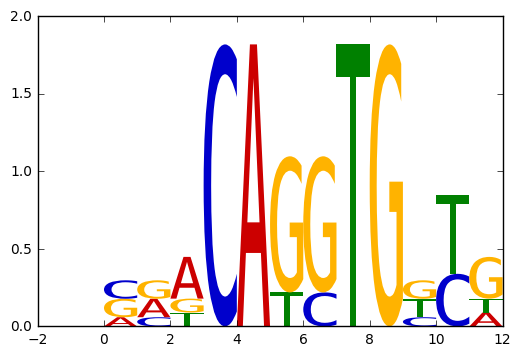

In [4]:
from Bio import motifs

with open("examples/transfac_motif.txt") as handle:
    m = motifs.parse(handle, "transfac")


fig=plt.figure()
ax=fig.add_subplot(111)

cbp = ConsensusMotifPlotter.from_bio_motif(m[0], scale_info_content=True)
cbp.plot(ax)

plt.show()

## Plot the importance weighted Nucleotides

In [20]:
# Read the example scoring file
import pandas as pd


location = []
sequence = []
scores = []
with open("examples/examples_scores.tsv", "rb") as file:
    for line in file:
        elem = line.decode("UTF-8").strip().split("\t")
        location.append(elem[0])
        sequence.append(elem[1])
        scores.append(np.array(elem[2:]).reshape((int((len(elem)-2)/4),4)).astype(np.float))

data_frame = pd.DataFrame({"Location": location, "Sequence": sequence, "Scores": scores})

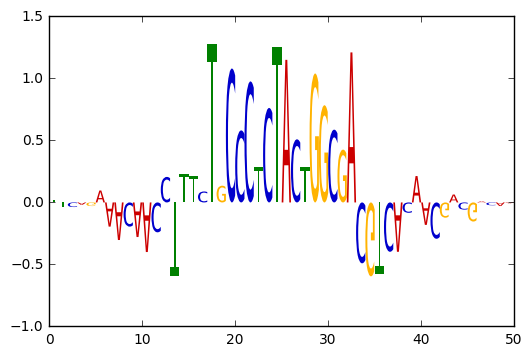

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111)

value = deepcopy(data_frame.iloc[1])
value.Scores = value.Scores[50:100]
value.Sequence = value.Sequence[50:100]
cbp = ConsensusMotifPlotter.from_importance_scoring(value)
cbp.plot(ax)

plt.show()

## Print Multiple Motifs next to each other